In [21]:

import cv2
import numpy as np
from matplotlib import pyplot as plt
from skimage.filters import threshold_sauvola
from skimage import img_as_ubyte
from skimage.transform import hough_line, hough_line_peaks, probabilistic_hough_line


import os

# A command line argument.
input_dir = "C:/Users/dartix/PycharmProjects/kiv-zvi/SP/data_katastr/"


img_names = os.listdir(input_dir)

input_name = input_dir + img_names[3]

print(input_name)




C:/Users/dartix/PycharmProjects/kiv-zvi/SP/data_katastr/UAZK-B2-a-04-C-1428-002.JPG


##### LOADING BW

In [22]:
def load_BW():
    return cv2.imread(input_name, cv2.IMREAD_GRAYSCALE)


#### LOADING COLORED

In [23]:
# It reads the image from the file.
def load_colored():
    # img = img[:,:,0]
    return cv2.cvtColor((cv2.imread(input_name,  cv2.COLOR_BGR2RGB)),  cv2.COLOR_BGR2RGB)

- convolving image by horizontal line detection mask

In [24]:
def convolve_horizontal_lightly(img):
    kernel_horizontal_lines = np.array([[-1,-1,-1],
                                        [2, 2, 2],
                                        [-1,-1,-1]])

    return cv2.filter2D(img, -1, kernel_horizontal_lines)

- convolving image by vertical line detection mask

In [25]:
def convolve_vertical_lightly(img):
    kernel_horizontal_lines = np.array([[-1,2,-1],
                                        [-1, 2, -1],
                                        [-1,2,-1]])

    return cv2.filter2D(img, -1, kernel_horizontal_lines)

- A Canny edge detector 

In [26]:
# img = cv2.Canny(img, 1, 500)
# ...
# kernel = np.ones((3,3), np.uint8)
# kernel[:,:] = 5
# print(kernel)
# img = cv2.dilate(img, kernel)
# img = cv2.erode(img, kernel)
# img = cv2.bitwise_not(img)

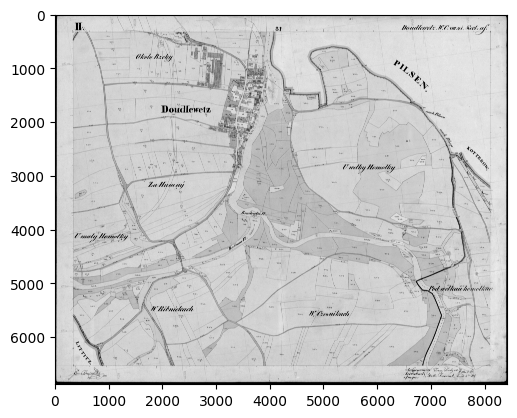

In [27]:
img = load_BW()

assert img is not None, "file could not be read, check with os.path.exists()"




plt.imshow(img, cmap="gray")

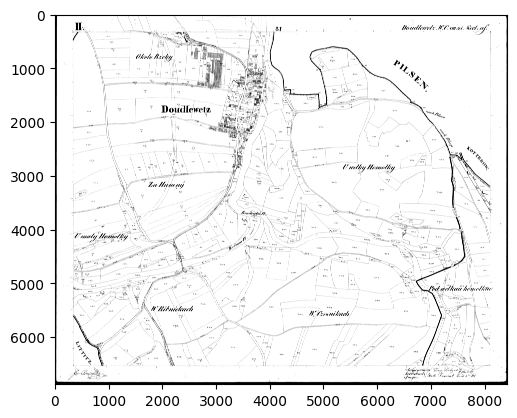

In [28]:

ret, thresh1 = cv2.threshold(img,100,155,cv2.THRESH_OTSU)

plt.imshow(thresh1, cmap="gray")
img = thresh1

In [29]:
# sauvola = (cv2.imread(input_name, cv2.IMREAD_GRAYSCALE))
# assert img is not None, "file could not be read, check with os.path.exists()"
# sauvola = threshold_sauvola(img, window_size=5, k=0.1)

# plt.imshow(sauvola, cmap="gray")
# img = sauvola

In [30]:
def get_sizes_procentual(procentual: float):
    # Taking the right xx% of the image.
    right_border = int(img.shape[1] * procentual)
    # Taking the left xx% of the image.
    left_border = int(img.shape[1] * (1 - procentual))
    # Taking the bottom xx% of the image.
    bottom_border = int(img.shape[0] * procentual)
    # Taking the top xx% of the image.
    top_border = int(img.shape[0] * (1 - procentual))
    return right_border, left_border, bottom_border, top_border

68 6812 84 8333
(6881, 8418)


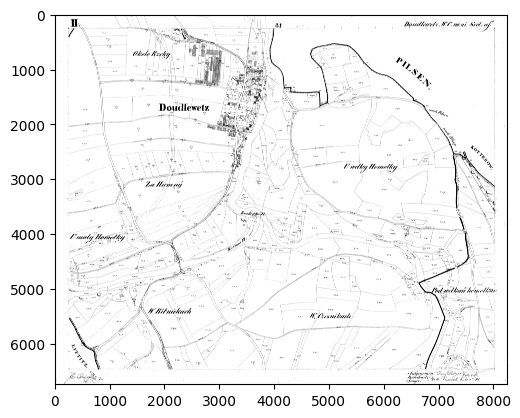

In [31]:
# todo 
right_border, left_border, bottom_border, top_border = get_sizes_procentual(0.01)
print(bottom_border, top_border, right_border, left_border)
print(img.shape)
img = img[bottom_border:top_border, right_border:left_border]

plt.imshow(img, cmap="gray")


In [32]:
# Taking the right 90% of the image.
right_border = int(img.shape[1] * 0.9)
# Taking the left 10% of the image.
left_border = int(img.shape[1] * 0.1)
# Taking the bottom 90% of the image.
bottom_border = int(img.shape[0] * 0.9)
# Taking the top 10% of the image.
top_border = int(img.shape[0] * 0.1)

# Taking the right, left, bottom and top border of the image.
right_border = img[:, right_border:]
left_border = img[:, :left_border]
bottom_border = img[bottom_border:, :]
top_border = img[:top_border, :]
print(top_border.shape)
# top_border = top_border.astype(int)
# top_border = img_as_ubyte(top_border)
print(top_border[:5])

(674, 8249)
[[155 155 155 ... 155 155 155]
 [155 155 155 ... 155 155 155]
 [155 155 155 ... 155 155 155]
 [155 155 155 ... 155 155 155]
 [155 155 155 ... 155 155 155]]


In [33]:
def euclidean_2D(x1, x2, y1, y2):
    return np.sqrt((x1-x2)**2 + (y1-y2)**2)

In [34]:


def get_vertical(x1, x2, y1, y2, theta=0.1, min_value=10):
    """
    computes if is line vertical or horisontal like by parameters theta as and min_value
    """

    if np.square(x1 - x2) < theta and np.square(y1 - y2) > min_value:
        return True
    elif np.square(x1 - x2) > min_value and np.square(y1 - y2) < theta:
        return False

    


In [89]:

def LDS(border):
        # Create default parametrization LSD
    lsd = cv2.createLineSegmentDetector(0)

    # Detect lines in the image
    lines = lsd.detect(border)[0]  # Position 0 of the returned tuple are the detected lines
    lines = np.squeeze(lines)
    return lines

def hough(border):
    
    #  Detecting lines in the image with probabilistic_hough_line transform
    lines = probabilistic_hough_line(border, threshold=5, line_length=50,
                                     theta= np.linspace(np.pi / 3, np.pi / 2, 180, endpoint=False),
                                 line_gap=3)
    for line in lines:
        p0, p1 = line
        plt.plot((p0[0], p1[0]), (p0[1], p1[1]), color="black")

    plt.show()
    lines = [[i[0], i[1], j[0], j[1]]  for i, j in lines]
    lines = np.array(lines)

    return lines

In [90]:


def make_line_detection(border, detection_method, horisontal_only=False, vertical_only=False):

    if horisontal_only:
        for _ in range(9):
            border = convolve_horizontal_lightly(border)
    elif vertical_only:
        for _ in range(9):
            border = convolve_vertical_lightly(border)

    lines = detection_method(border)


   
    # directions = np.array([get_vertical(i[0], i[2], i[1], i[3],theta=1, min_value=1)  for i in lines])
    # vertical = lines[directions == False,:]
    # print("vertical", vertical.shape)
    # horisontal = lines[directions == True,:]
    # print("horisontal", horisontal.shape)

    # if horisontal_only:
    #     lines = horisontal

    # elif vertical_only:
    #     lines = vertical


    # print(lines.shape)
    distances = np.array([euclidean_2D(i[0], i[2], i[1], i[3],)  for i in lines])
    print("distances.shape", distances.shape)

    print(distances.shape)
    plt.plot(np.arange(0, len(distances)), distances)
    plt.show()
    longest_lines = lines[distances > np.percentile(distances, 75)]
    # longest_lines = lines
    print("longest_lines.shape", longest_lines.shape)

    longest_lines = longest_lines.astype(int)
    print(longest_lines)

    plt.plot((longest_lines[:][0], longest_lines[:][1]), (longest_lines[:][2], longest_lines[:][3]), color="black")
    plt.show()



    border[:,:] = 255

    # Draw detected lines in the image
    for i in longest_lines:
        border = cv2.line(border, (i[0], i[1]), (i[2], i[3]), (0))
    print(border.shape)
    # It converts the image from BGR to grayscale.
    # drawn_img = cv2.cvtColor(white, cv2.COLOR_BGR2GRAY)
    plt.imshow(border, cmap="gray")
    # return border

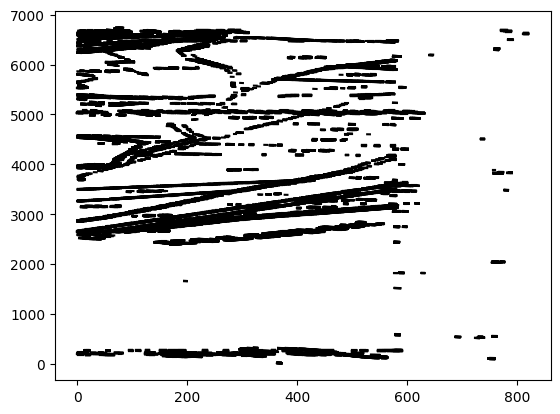

distances.shape (23284,)
(23284,)


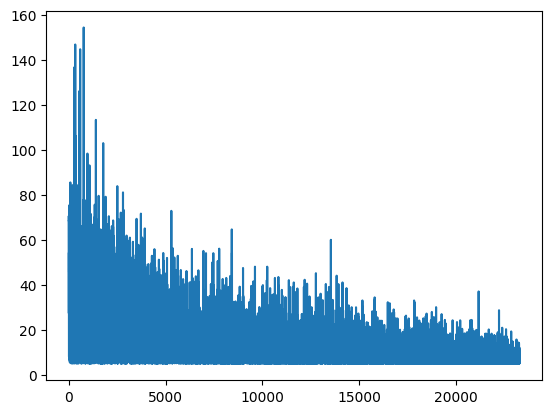

longest_lines.shape (5765, 4)
[[ 203 6572  268 6550]
 [ 345 6525  412 6503]
 [ 345 6527  408 6505]
 ...
 [ 759 2044  776 2035]
 [ 125 2723  138 2716]
 [ 163 4778  177 4771]]


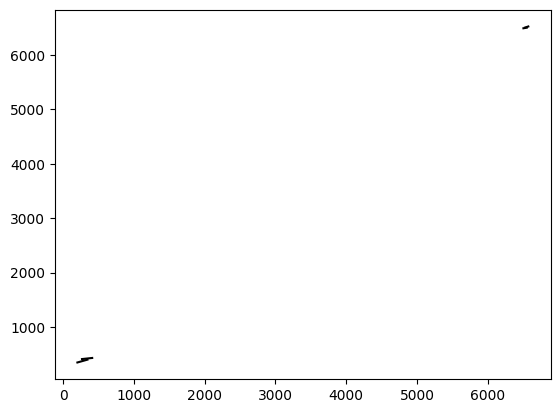

(6744, 825)


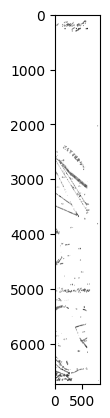

In [85]:
make_line_detection(right_border, hough,  horisontal_only=False, vertical_only=True)

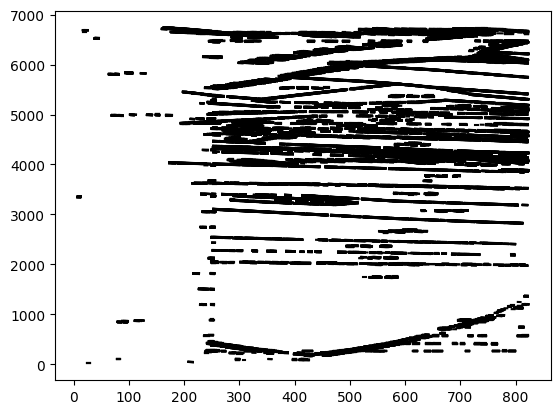

distances.shape (27108,)
(27108,)


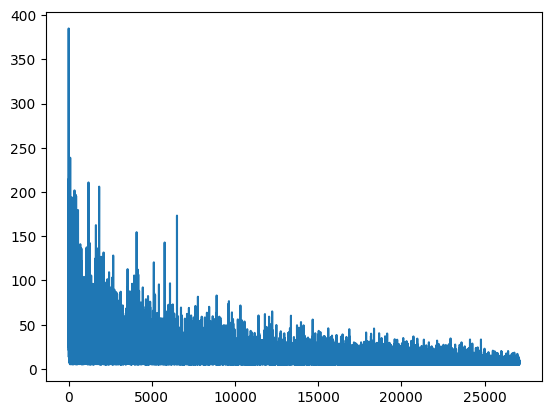

longest_lines.shape (6759, 4)
[[ 488 4243  508 4234]
 [ 677 2875  725 2849]
 [ 471 4284  821 4124]
 ...
 [ 676 6130  693 6128]
 [ 227 1510  243 1502]
 [ 703 4262  720 4255]]


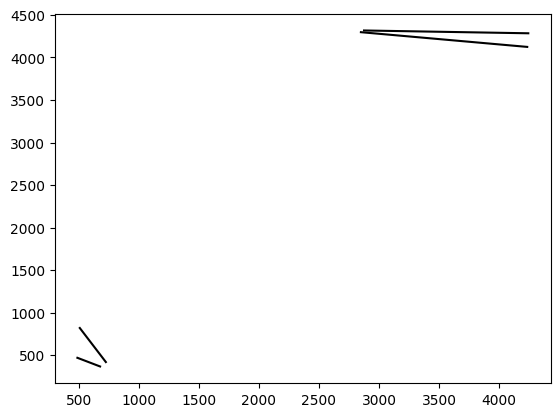

(6744, 824)


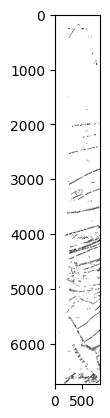

In [86]:
make_line_detection(left_border, hough, horisontal_only=False, vertical_only=True)

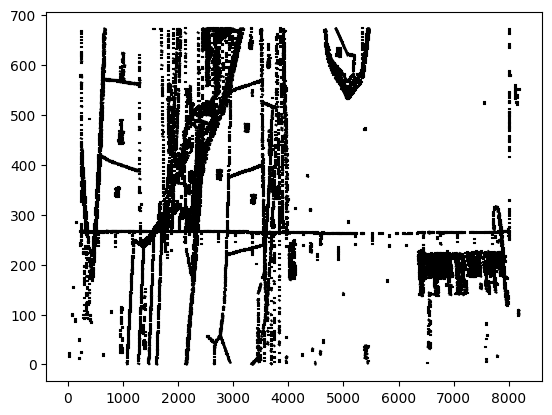

distances.shape (15910,)
(15910,)


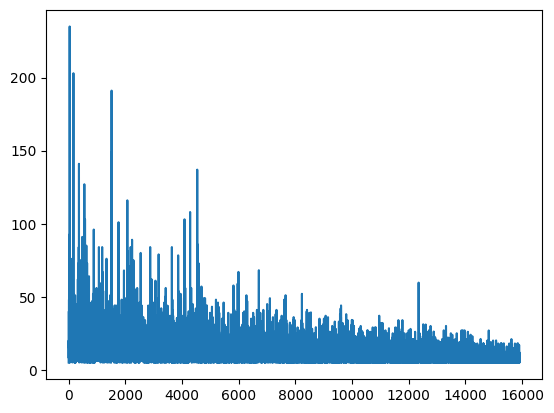

longest_lines.shape (3626, 4)
[[2149  357 2169  357]
 [ 324  292  341  292]
 [6842  206 6860  205]
 ...
 [5337  673 5355  673]
 [4977  551 4993  548]
 [3439   74 3456   74]]


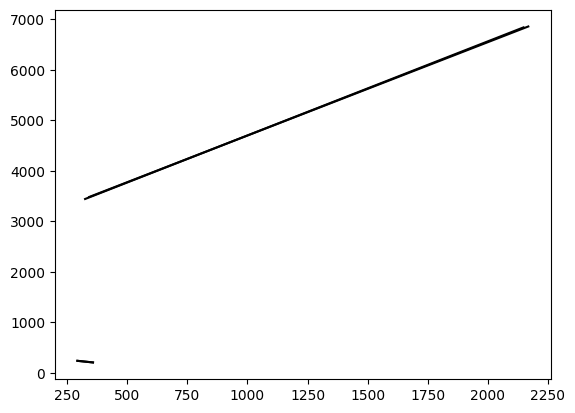

(674, 8249)


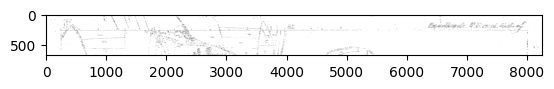

In [87]:
make_line_detection(top_border, hough, horisontal_only=True, vertical_only=False)

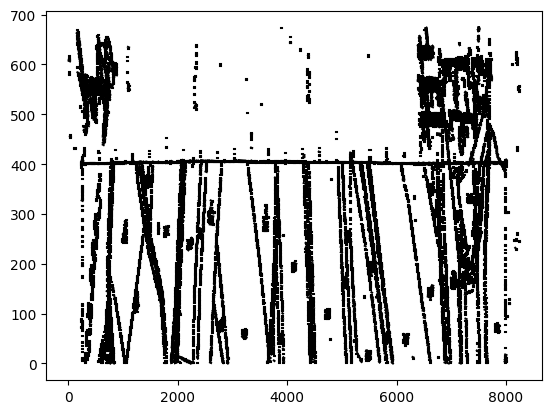

distances.shape (20353,)
(20353,)


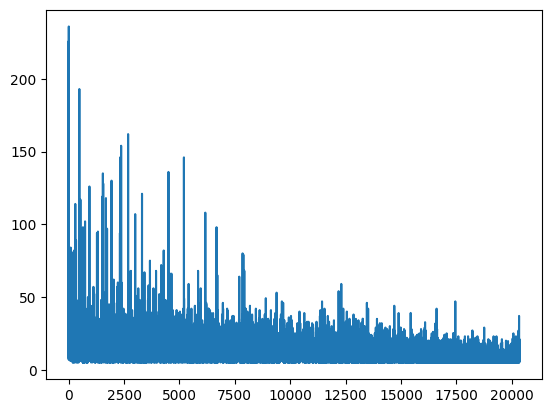

longest_lines.shape (4618, 4)
[[6874    9 6892    9]
 [6445  399 6490  399]
 [ 488  403  714  403]
 ...
 [2038    1 2065    1]
 [1954    5 1991    5]
 [1904   51 1925   51]]


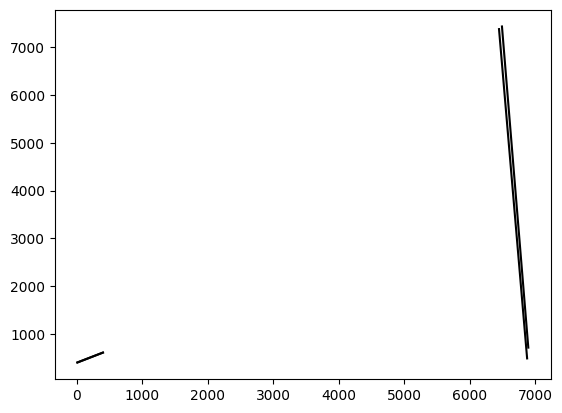

(675, 8249)


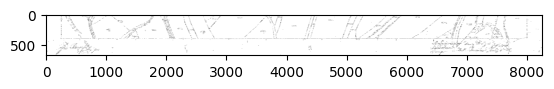

In [88]:
make_line_detection(bottom_border, hough, horisontal_only=True)
